In [1]:
import pandas as pd
import numpy as np

np.random.seed(7)

print ("Data Frame created with Manually-labelled data for AAPL stocks")
aapl=pd.read_csv("./Cleaned_data/Manually_labelled_clean_aapl.csv")

print("\n[INFO] Apple Data Frame - Manually Labelled Sentiments")
aapl.info()


Data Frame created with Manually-labelled data for AAPL stocks

[INFO] Apple Data Frame - Manually Labelled Sentiments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 3 columns):
date         3977 non-null object
sentiment    3969 non-null float64
text         3977 non-null object
dtypes: float64(1), object(2)
memory usage: 245.7+ KB


In [10]:
import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [3]:
#aapl=aapl.dropna()
len(aapl)

3969

In [4]:
aapl.head()

,date,sentiment,text
0,28-04-19 14:37,2.0,the big five faang stock and sector service is...
1,28-04-19 10:48,2.0,apple ipad ipadair aapl ebay kleinanzeigen de ...
2,28-04-19 9:25,4.0,xlu back in range mild bullish bias best to wa...
3,27-04-19 23:30,2.0,aapl apple
4,27-04-19 22:47,4.0,iyr seems to be back on track indicates upcomi...


In [5]:
from sklearn.model_selection import train_test_split

text=aapl.text
target=aapl.sentiment

X_train,X_test,y_train,y_test=train_test_split(text,target, random_state=27,test_size=0.2)

In [7]:
!pip install wordcloud

You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


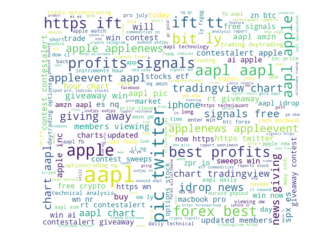

In [8]:
# REFERENCE: https://github.com/amueller/word_cloud
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Read the whole text.
text1 = open("./Cleaned_data/Manually_labelled_clean_aapl.csv").read()

stopwords = set(STOPWORDS)

# lower max_font_size
wordcloud = WordCloud(max_font_size=100,
                          background_color='white',
                          width=1200,
                          height=1000,
                     stopwords=stopwords).generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [9]:

# importing required libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# import GridSearch
from sklearn.model_selection import GridSearchCV

# To store the results
classifier_results={}

# using count vectorizer instead of tfidf
# tokenizing only alpha numeric
tokenPatt = '[A-Za-z0-9]+(?=\\s+)'

# pipeline which does two steps all together:
# (1) generate CountVector, and (2) train classifier
# each step is named, i.e. "vec", "clf"
pl_1 = Pipeline([
        ('tfidf', CountVectorizer(token_pattern = tokenPatt)),
        ('clf', LogisticRegression())
    ])

pl_1.fit(X_train,y_train)

# accuracy
accuracy = pl_1.score(X_test,y_test)
print ("Untuned Accuracy of Logistic Regression using CountVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of Logistic Regression using CountVectorizer"]=accuracy


# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__token_pattern':['[A-Za-z0-9]+(?=\\s+)'],
              'tfidf__stop_words':[None,"english"],
              'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(pl_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])

print("Best f1 score:", gs_clf.best_score_)

Untuned Accuracy of Logistic Regression using CountVectorizer:  0.672544080605


C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision

C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users

C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-package

C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-package

C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\vigee\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_analysis_vader_validation(df, filepath):
    sid = SentimentIntensityAnalyzer()
    # print df.head()
    d = []
    sentiment_map = {'pos': 4, 'neg': 0, 'neu': 2}
    for index, tweet in df.iterrows():

        if len(str(tweet['text']).split()) > 4:
            tweet_txt = tweet['text']
            tweet_date = tweet['date']
            tweet_manual_label = tweet['sentiment']

            ss = sid.polarity_scores(tweet_txt)

            '''MAX LOGIC'''
            score_sentiment = max(ss['neg'], ss['neu'], ss['pos'])

            '''
            # COMPLEX LOGIC
            if ss['neg']>0 and ss['pos']>0 and ss['neu']>0:
                score_sentiment = max(ss['neg'], ss['neu'], ss['pos'])
            elif ss['neg']==0 and ss['pos']>0 and ss['neu']>0:
                score_sentiment = ss['pos']
            elif ss['pos'] == 0 and ss['neg'] > 0 and ss['neu'] > 0:
                score_sentiment = ss['neg']
            elif ss['pos'] == 0 and ss['neg'] == 0 and ss['neu'] > 0:
                score_sentiment = ss['neu']
            '''
            sentiment = [k for k, v in ss.items() if v == score_sentiment][0]
            sentiment_mapping = sentiment_map[sentiment]
            if tweet_manual_label == sentiment_mapping:
                validation_result='Match'
            else:
                validation_result='Mismatch'

            d.append({'date': tweet_date, 'text': tweet_txt, 'polarity_score_neg':ss['neg'], 'polarity_score_neu':ss['neu'], 'polarity_score_pos':ss['pos'], 'predicted_sentiment': sentiment_mapping, 'labeled_sentiment':tweet_manual_label, 'validation_result': validation_result})

    df_processed = pd.DataFrame(d)
    #df_processed.to_csv(filepath, index=False)
    print df_processed.groupby(['validation_result'])['validation_result'].count()
    

# Using merged_df created in Step A1
# merged_df has all the labelled tweets for MSFT and AAPL
output_file = 'vader_predictions.csv'
sentiment_analysis_vader_validation(merged_df, output_file)